In [1]:
import numpy as np
import mrcfile
from matplotlib import pyplot as plt
# %matplotlib inline
import collections
import tensorflow as tf
from tensorflow import spectral
from ClassFiles.relion_fixed_it import load_star
from ClassFiles.AdversarialRegularizer import AdversarialRegulariser
from ClassFiles.ut import l2
from ClassFiles.Utilities import registration
from ClassFiles.ut import locate_gt, rfft, irfft, unify_form, Rescaler, find

In [2]:
NOISE_LEVEL = '01'
pdb_id = '5A0M' #  9ICA

external_path= '/local/scratch/public/sl767/MRC_Data/Data/Data_001_10k/eval/AR/'.format(NOISE_LEVEL)
classical_path= '/local/scratch/public/sl767/MRC_Data/Data/Data_0{}_10k/eval/EM/'.format(NOISE_LEVEL)

In [3]:
with mrcfile.open(locate_gt(pdb_id, full_path=False)) as mrc:
    gt = mrc.data.copy()
    
gt = unify_form(gt)
r_gt = Rescaler(gt)
r_gt.normalize(gt)

def find_iteration(k, source=0):
    it = ''
    if k<10:
        it = '0'+str(k)
    else:
        it = str(k)
        
    if source==0:
        path = external_path+pdb_id
        l = find('*it0{}_half2_class001_external_reconstruct.mrc'.format(it),path)
    elif source==1:
        path = classical_path+pdb_id
        l = find('*it0{}_half2_class001.mrc'.format(it),path)
    else:
        path = debugging_path
        l = find('*Iteration_0{}.mrc'.format(it),path)

    assert len(l)==1
    with mrcfile.open(l[0]) as mrc:
        res = mrc.data.copy()
    return res

def vis(data):
    #plt.imshow(im[...,45])
#     plt.imshow(np.mean(data.squeeze(), axis=-1))
#     plt.imshow(data.squeeze().mean(axis=-1))
    plt.imshow(np.maximum(0,data.squeeze()[...,45]))

In [4]:
Registrator = registration.LocalRegistrator()

In [5]:
def l2_gt(x):
    image=unify_form(np.copy(x))
    r=Rescaler(image)
    r.normalize(image)
    reg=Registrator.register(image=image, reference=gt)
    return l2(reg-gt)

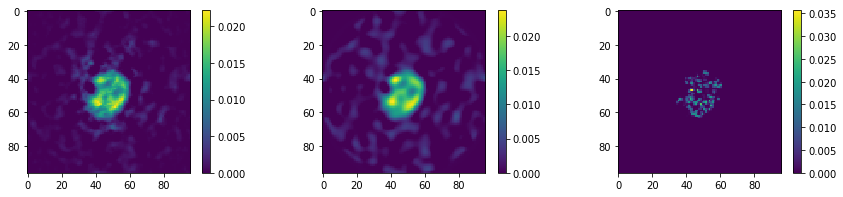

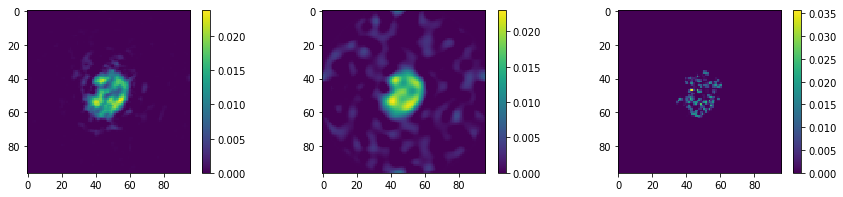

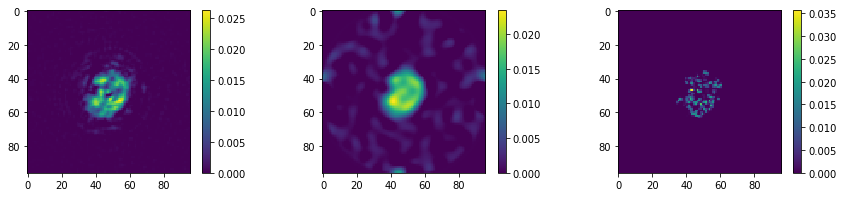

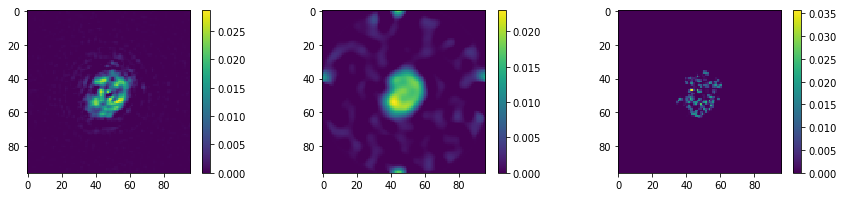

AssertionError: 

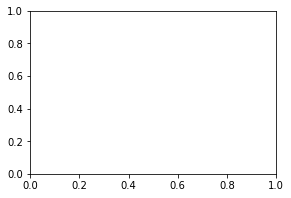

In [6]:
ITERATIONS = 9

for k in range(ITERATIONS):
    if k%2 == 0:
        plt.figure(k, figsize=(15,3))
        plt.subplot(131)
        im1 = find_iteration(k+1, source=0)
        vis(im1)
        plt.colorbar()
        plt.subplot(132)
        im2=find_iteration(k+1, source=1)
        vis(im2)
        plt.colorbar()
        plt.subplot(133)
        vis(gt)
        plt.colorbar()
        plt.show()
    
#     savefig(im1, 'AR_Iteration_{}.png'.format(k+1))
#     savefig(im1, 'TY_Iteration_{}.png'.format(k+1))

In [ ]:
l2_gt(find_iteration(ITERATIONS, source=1))

In [ ]:
l2_gt(find_iteration(ITERATIONS, source=0))

In [7]:
res_EM = []
res_AR = []
for k in range(ITERATIONS):
    res_EM.append(l2_gt(find_iteration(k+1, source=1)))
    res_AR.append(l2_gt(find_iteration(k+1, source=0)))

1.06754
1.04821
1.04621
1.04327
1.03947
Final Registration Loss: 1.03946
Rotation: 
[[[  9.99744534e-01  -1.73099816e-03   2.25360505e-02]
  [  1.71182258e-03   9.99998093e-01   8.70146439e-04]
  [ -2.25375146e-02  -8.31346435e-04   9.99745607e-01]]]
Translation: 
[[[ 0.00020514]
  [ 0.00940814]
  [ 0.0051818 ]]]
0.923117
0.908675
0.91054
0.908728
0.906695
Final Registration Loss: 0.905767
Rotation: 
[[[ 0.9997967  -0.00255396  0.02000044]
  [ 0.00252362  0.9999957   0.00154192]
  [-0.02000428 -0.00149113  0.99979883]]]
Translation: 
[[[ 0.00100389]
  [ 0.00989363]
  [ 0.00494516]]]
1.08185
1.06514
1.061
1.05583
1.05518
Final Registration Loss: 1.05477
Rotation: 
[[[  9.99806225e-01  -4.49876650e-04   1.96811277e-02]
  [  3.80027253e-04   9.99993563e-01   3.55264777e-03]
  [ -1.96825974e-02  -3.54448031e-03   9.99799967e-01]]]
Translation: 
[[[ 0.00145093]
  [ 0.01020359]
  [ 0.00303108]]]
0.878938
0.868009
0.867706
0.865141
0.864778
Final Registration Loss: 0.864531
Rotation: 
[[[ 0.9

AssertionError: 

In [8]:
print('Tychonov')
print(res_EM)
print('AR')
print(res_AR)

Tychonov
[0.98707801, 0.99385297, 0.99651629, 0.99910665, 1.0039783, 1.0071547, 1.024963, 1.0372069, 1.0463297]
AR
[0.92427576, 0.9039281, 0.89199477, 0.88273787, 0.87471908, 0.86896282, 0.86333442, 0.86079329]


In [ ]:
vis(new_gt)

In [ ]:
plt.figure(k, figsize=(18,5))
plt.subplot(131)
im1 = find_iteration(13, source=0)
vis(im1)
plt.subplot(132)
im2=find_iteration(17, source=1)
vis(im2)
plt.subplot(133)
vis(new_gt)

In [ ]:
for k in range(17):
    plt.figure(k, figsize=(15,5))
    im1 = find_iteration(k+1, source=1)
    vis(im1)
    plt.colorbar()


In [ ]:
path_f_ar = external_path+pdb_id+'/5A0M_mult002_class001.mrc'
path_f_rel = classical_path+pdb_id+'/5A0M_mult002_class001.mrc'
with mrcfile.open(path_f_ar) as mrc:
    FINAL_AR = mrc.data.copy()
with mrcfile.open(path_f_rel) as mrc:
    FINAL_REL = mrc.data.copy()
    
savefig(FINAL_AR, 'AR_final.png')
savefig(FINAL_REL, 'TY_final.png')

plt.figure(figsize=(15,5))
plt.subplot(131)
vis(FINAL_AR)
plt.subplot(132)
vis(FINAL_REL)
plt.subplot(133)
vis(gt)

In [ ]:
def savefig(array, name, dpi=100.0):
    """Pixel perfect image saving."""
    fig = plt.figure(figsize=np.array(array.shape) / dpi, dpi=dpi)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    im = ax.imshow(array, cmap='gray')
    plt.savefig(name)